In [2]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np  #use to construct arrays
#assingment 1

df1 = pd.read_csv('Assignment 1 - steps data.csv', delimiter = ';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv('Assignment 1 - survey data.csv')
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [4]:
df['mean_steps'] = 0  # made a new collum #Change into nan if possible 
for r in range(929):
    mean = np.array(list(df1.iloc[r, 10:]))
    mean = np.nanmean(mean)
    if (str(mean) != 'nan'):
        df.iloc[r,10]=mean # added the mean_steps of every person to the collum 
df

/Users/quintennaayen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3455.074074
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4986.550505
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6376.038168
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5516.014493
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Bordeaux,male,25-34,5,family,high school,177.0,69.0,88.0,9903.045455
925,926,Bordeaux,male,35-44,1,single,bachelor,172.0,66.0,81.0,5242.325000
926,927,Lyon,female,45-54,3,family,primary,169.0,108.0,108.0,8816.908714
927,928,Montpellier,female,35-44,1,single,master or doctorate,167.0,64.0,85.0,5431.582160


In [5]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 11 columns):
id            929 non-null int64
city          929 non-null object
gender        929 non-null object
age           929 non-null object
hh_size       929 non-null int64
hh_type       929 non-null object
education     928 non-null object
height        925 non-null float64
weight        927 non-null float64
waist         928 non-null float64
mean_steps    929 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 80.0+ KB


In [6]:
df['waist'].value_counts() #Get all the values. This may be less useful when there are many values.

90.0     46
80.0     46
84.0     35
83.0     32
82.0     30
         ..
131.0     1
36.0      1
39.0      1
35.0      1
147.0     1
Name: waist, Length: 85, dtype: int64

In [13]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

def above_111(x):
    if(x > 111.0): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(above_111)

In [14]:
df['waist'].value_counts()

90.0     46
80.0     46
84.0     35
83.0     32
75.0     30
82.0     30
85.0     29
95.0     28
92.0     28
87.0     28
88.0     28
100.0    26
70.0     26
86.0     25
89.0     24
76.0     23
93.0     22
78.0     22
73.0     21
77.0     18
98.0     18
97.0     16
91.0     16
74.0     15
99.0     14
110.0    14
72.0     14
65.0     14
105.0    14
81.0     14
79.0     13
101.0    12
68.0     12
96.0     11
67.0     11
94.0     11
69.0      9
71.0      8
106.0     7
60.0      7
109.0     7
66.0      6
104.0     6
103.0     6
108.0     6
111.0     4
102.0     4
62.0      4
107.0     3
58.0      2
61.0      2
64.0      2
63.0      2
55.0      1
53.0      1
56.0      1
Name: waist, dtype: int64

In [15]:
df['waist'] = df['waist'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def below_50(x):
    if(x < 50): 
        return float('NaN')
    else: 
        return x
df['waist'] = df['waist'].apply(below_50)

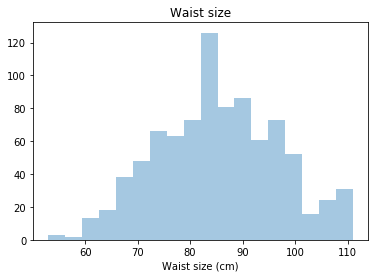

In [16]:
sns.distplot(df['waist'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Waist size')
plt.xlabel('Waist size (cm)')
plt.show()

In [17]:
df['height'].value_counts()

170.0    62
180.0    53
165.0    51
175.0    50
172.0    45
160.0    45
168.0    44
178.0    36
163.0    32
169.0    31
173.0    29
162.0    29
167.0    28
176.0    28
183.0    26
182.0    25
185.0    24
174.0    23
171.0    20
177.0    19
158.0    19
181.0    18
186.0    17
187.0    16
164.0    16
166.0    15
161.0    15
179.0    13
157.0    11
155.0     9
156.0     9
188.0     9
184.0     9
159.0     6
190.0     6
192.0     5
153.0     4
152.0     4
189.0     4
154.0     4
150.0     3
195.0     3
193.0     3
151.0     3
191.0     2
197.0     1
145.0     1
Name: height, dtype: int64

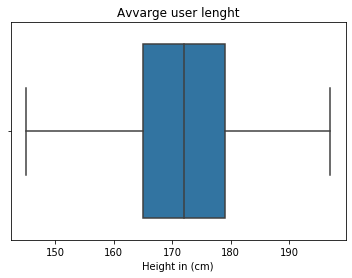

In [18]:
sns.boxplot(df['height']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Avvarge user lenght')
plt.xlabel('Height in (cm)')
plt.show()

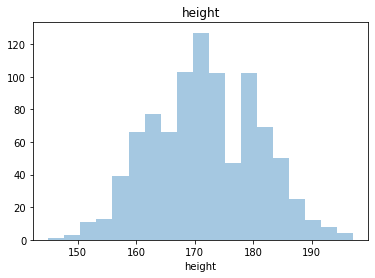

In [19]:
df["height"].name = 'height' #Labeling the variable for plotting
height_av = df["height"].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(height_av, kde=False)
plt.title('height')
plt.show()

The median of height is: 172.0 cm
The mean of height is: 171.7545945945946 cm


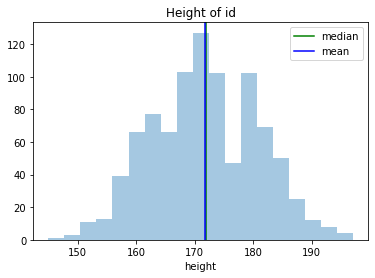

In [20]:
mean_size = df["height"].mean()
median_size = df["height"].median()
print(f'The median of height is: {median_size} cm')
print(f'The mean of height is: {mean_size} cm')
sns.distplot(height_av, kde=False)
plt.title('Height of id')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100
plt.axvline(mean_size, 0, 100, color='blue', label='mean')
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

In [23]:
meanDays = df1[['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013', '25-6-2013', '26-6-2013', '27-6-2013',
              '28-6-2013', '29-6-2013', '30-6-2013']] #show data of all the days in june
meanDays = meanDays.mean() #calculate the mean

print(meanDays)

20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
23-6-2013     7631.215548
24-6-2013     7981.666667
25-6-2013     8863.362275
26-6-2013     8214.184713
27-6-2013     8494.011561
28-6-2013     9270.012723
29-6-2013     6931.211470
30-6-2013     8739.387179
dtype: float64


Text(0, 0.5, 'Steps')

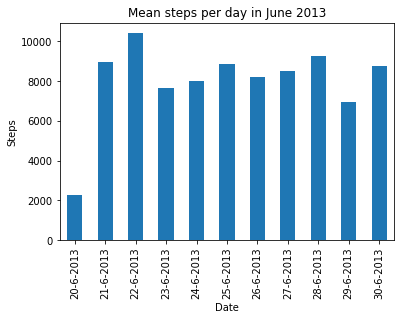

In [24]:
plotMean = meanDays.plot(kind='bar', title='Mean steps per day in June 2013')
plotMean.set_xlabel("Date")
plotMean.set_ylabel("Steps")

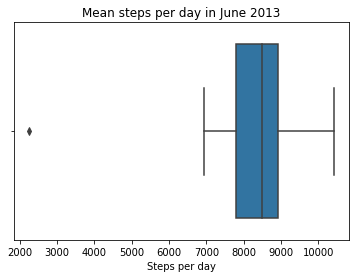

In [25]:
sns.boxplot(meanDays)
plt.title('Mean steps per day in June 2013')
plt.xlabel('Steps per day')
plt.show()

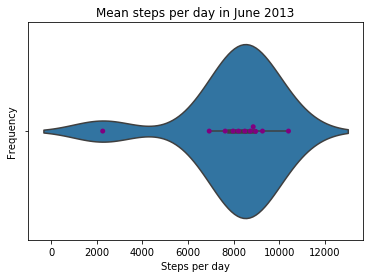

In [26]:
sns.violinplot(meanDays)
sns.swarmplot(meanDays, color='purple')
plt.title('Mean steps per day in June 2013')
plt.ylabel('Frequency')
plt.xlabel('Steps per day')
plt.show()

In [27]:
mean_size = meanDays.mean()
median_size = meanDays.median()

print(f'The median steps per day is: {median_size} steps')
print(f'The mean steps per day is: {mean_size} steps')
#Assignment 1 ends here.

The median steps per day is: 8494.011560693642 steps
The mean steps per day is: 7978.141742744361 steps


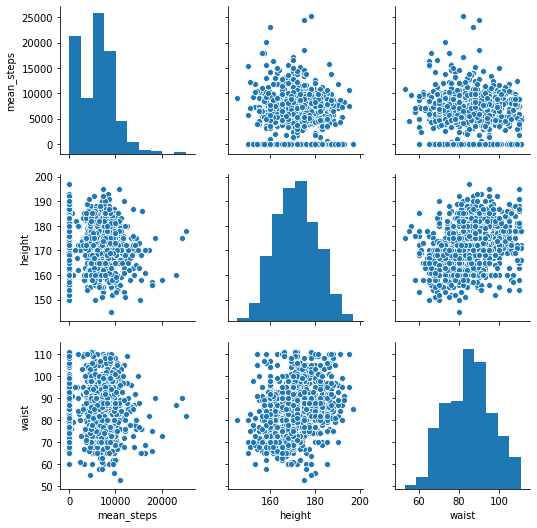

In [29]:
#Assignment 2 starts here:
df_2 = df[['mean_steps','height','waist']] #making a new dataframe with a subset
sns.pairplot(df_2.dropna())
plt.show()

In [30]:
df_2['mean_steps'].value_counts()

0.000000        220
6299.500000       1
8634.930000       1
7430.431373       1
1773.947368       1
               ... 
4048.948357       1
13017.016779      1
8165.949153       1
5066.401460       1
7070.675325       1
Name: mean_steps, Length: 710, dtype: int64

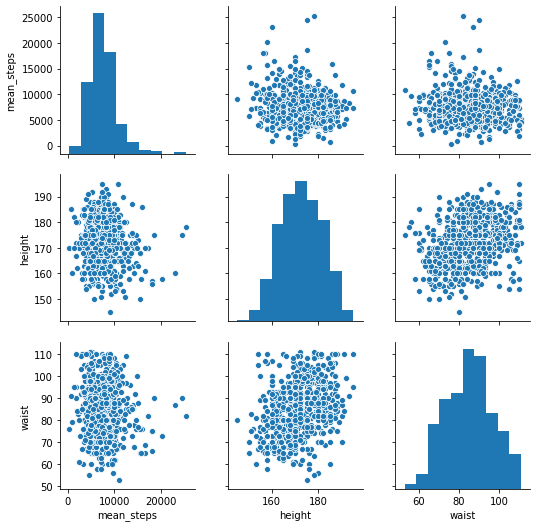

In [31]:
df = df[(df['mean_steps'] > 100)& (df['height'] > 10) & (df['waist'] > 0)] #remove wrong data
df_2 = df[['mean_steps','height','waist']]
sns.pairplot(df_2.dropna())
plt.show()

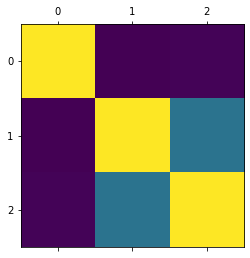

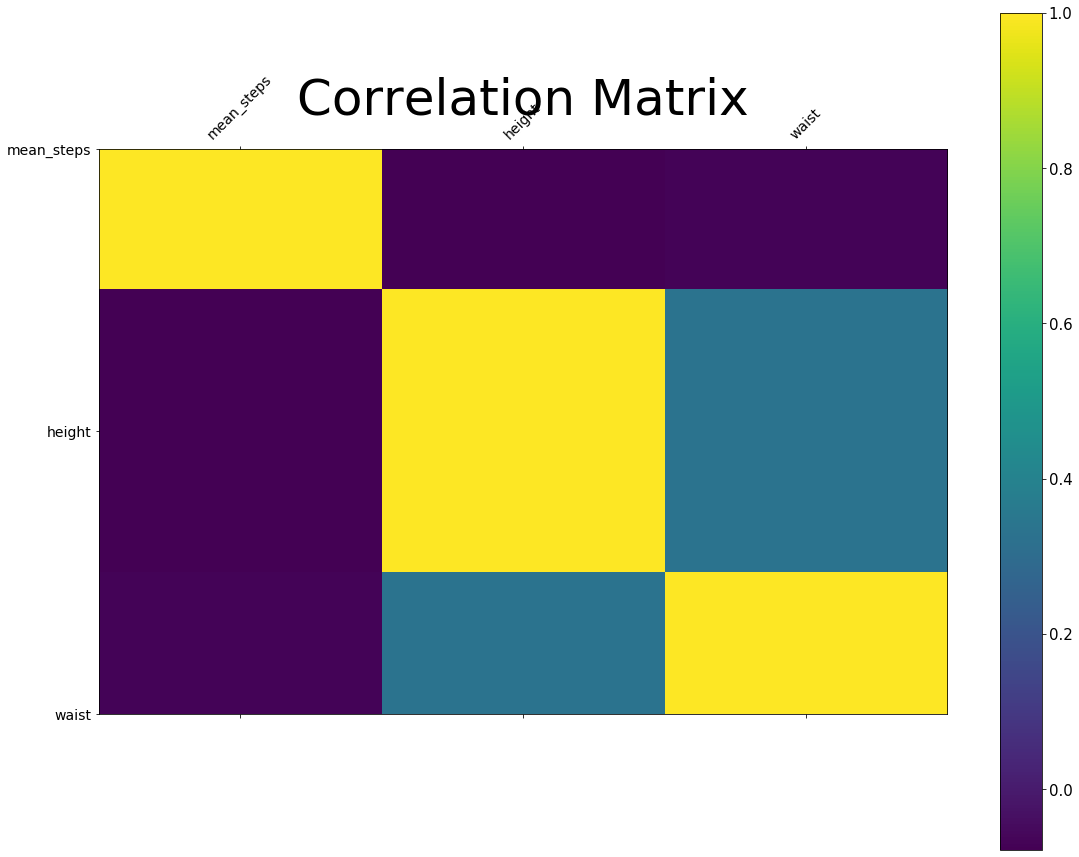

In [79]:
#Correlation matrix with the three variables with meansteps, height and waist
plt.matshow(df_2.corr())
plt.show()

Cor = plt.figure(figsize=(19, 15))
plt.matshow(df_2.corr(), fignum=Cor.number)
plt.xticks(range(df_2.shape[1]), df_2.columns, fontsize=14, rotation=45)
plt.yticks(range(df_2.shape[1]), df_2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=50);

Text(0.5, 1.0, 'Scatterplot Mean_steps & Height')

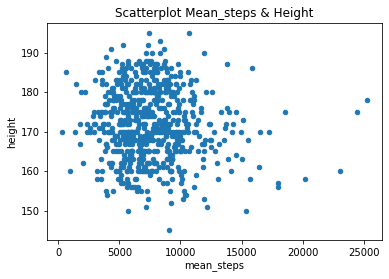

In [64]:
#Scatterplots 
df_2.plot.scatter(x="mean_steps",y="height") #scatter plot of the mean_steps and height
plt.title('Scatterplot Mean_steps & Height')

Text(0.5, 1.0, 'Scatterplot Mean_staps & Waist')

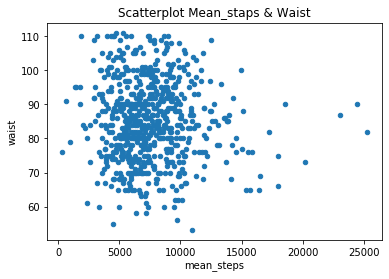

In [65]:
df_2.plot.scatter(x="mean_steps",y="waist") #scatter plot of the mean_steps and waist 
plt.title('Scatterplot Mean_staps & Waist')

In [66]:
from scipy.stats.stats import pearsonr #We will need the correlation function, pearson. 
print(pearsonr(df_2['mean_steps'],df_2['height']))
print(pearsonr(df_2['mean_steps'],df_2['waist']))

(-0.07785283664342815, 0.04475955691302833)
(-0.06731510096122803, 0.08281228962569437)


In [67]:
# output are two numbers, wich is r & p 
# Mean_steps and height are weak negatively correlated (r = - 0.08)
# p-value of Mean_steps and height, 0.04 is less than 0.05, there's no difference between the means and can I conclude that a significant difference does exist
# Mean_steps and waist are weak negatively correlated (r = - 0.07)
# p-value of Mean_steps and waist, 0.08 is more than 0.05, we cannot conclude that a significant difference exists.


In [68]:
#The relation of mean steps per participant with a qualitative variable with two levels
pd.crosstab(df["mean_steps"], df["gender"])

gender,female,male
mean_steps,,
331.500000,0,1
626.500000,0,1
924.384615,1,0
1339.400000,0,1
1422.194444,0,1
...,...,...
18532.130435,0,1
20191.457516,1,0
23048.694969,1,0


In [69]:
pd.crosstab(df["mean_steps"],df["gender"], normalize="columns").describe() # step count per gender

gender,female,male
count,665.000000,665.000000
mean,0.001504,0.001504
std,0.001591,0.001423
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.002849
75%,0.003185,0.002849
max,0.003185,0.002849


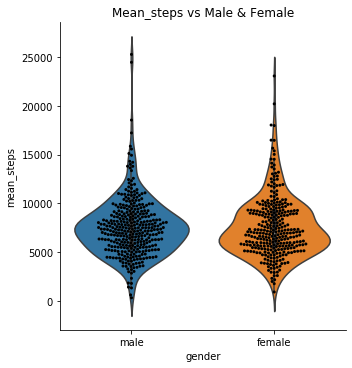

In [70]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)   #steps per gender in a swarmplot 
sns.swarmplot(x="gender", y="mean_steps", size=3, color="k", data=df)
plt.title('Mean_steps vs Male & Female')
plt.show()

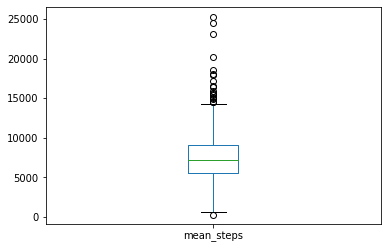

In [71]:
from scipy import stats
import matplotlib.pyplot as plt

df[['mean_steps', 'gender']].plot(kind='box')


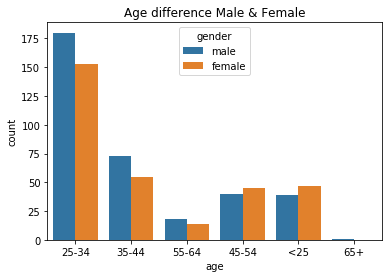

In [72]:
#relation between qualitative variables 
sns.countplot(x="age", hue="gender", data=df)        
plt.title('Age difference Male & Female')
plt.show()

In [73]:
#Cross table % Male & Female
pd.crosstab(df["age"],df["gender"], normalize="columns") 

gender,female,male
age,,
25-34,0.487261,0.512821
35-44,0.175159,0.207977
45-54,0.143312,0.113960
55-64,0.044586,0.051282
65+,0.000000,0.002849
<25,0.149682,0.111111


In [74]:
#end of assignment 2, don't know exactly how to read and calculate a t-test 